In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# additional dependencies I will use to visualize the data during EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.shape

(34299, 12)

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN'])

In [6]:
application_df.shape

(34299, 11)

In [7]:
application_df.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [8]:
application_df.shape

(34299, 11)

In [9]:
# Determine the number of unique values in each column.
# for col in application_df:
#    print(application_df[col].unique())
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [10]:
# examine value counts for STATUS
application_df["STATUS"].value_counts()

# drop STATUS as it has very little variability / information

1    34294
0        5
Name: STATUS, dtype: int64

In [11]:
# Drop the additional non-beneficial columns, 'STATUS', AND 'SPECIAL CONSIDERATIONS'
application_df = application_df.drop(columns=['STATUS', 'SPECIAL_CONSIDERATIONS'])
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


In [12]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [13]:
application_counts.describe()

count       17.000000
mean      2017.588235
std       6468.877251
min          1.000000
25%          3.000000
50%        156.000000
75%       1065.000000
max      27037.000000
Name: APPLICATION_TYPE, dtype: float64

<AxesSubplot:ylabel='Density'>

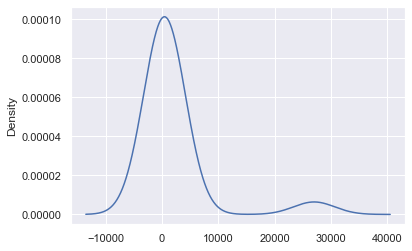

In [14]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

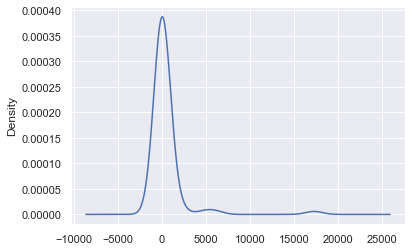

In [17]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [18]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [19]:
# Look at NAME value counts for binning
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

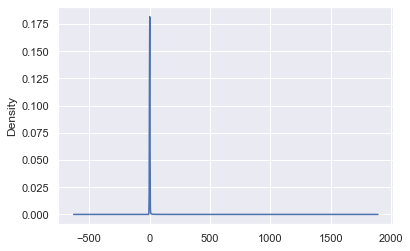

In [20]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [21]:
# how many name_counts are there with only 1?
name_counts[name_counts] <= 1

SOUTHWEST DEKALB EXTRA POINT CLUB                               True
WEBSTER GROVES SCHOOL DISTRICT PARENT-TEACHERS ORGANIZATION    False
EARLY CHILDHOOD MUSIC ASSOCIATION                              False
THE ARK OF TEXAS                                               False
AMERICAN ORFF-SCHULWERK ASSOCIATION                            False
                                                               ...  
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
Name: NAME, Length: 19568, dtype: bool

In [22]:
# how many name_counts are there with less than 5?
name_counts[name_counts] <= 5

SOUTHWEST DEKALB EXTRA POINT CLUB                               True
WEBSTER GROVES SCHOOL DISTRICT PARENT-TEACHERS ORGANIZATION     True
EARLY CHILDHOOD MUSIC ASSOCIATION                               True
THE ARK OF TEXAS                                                True
AMERICAN ORFF-SCHULWERK ASSOCIATION                             True
                                                               ...  
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
Name: NAME, Length: 19568, dtype: bool

In [23]:
# how many name_counts are there with less than 100 and greater than 5?
name_counts[((name_counts <= 100) & (name_counts > 5))]

AIR FORCE ASSOCIATION                                      99
WORKERS UNITED                                             97
GAMMA THETA UPSILON                                        92
INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS                 91
SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES    87
                                                           ..
OLD OAK CLIFF CONSERVATION LEAGUE INC                       6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                      6
HUMBLE ISD EDUCATIONAL SUPPORT GROUPS INC                   6
PROFESSIONAL LOADMASTER ASSOCIATION                         6
CBMC INC                                                    6
Name: NAME, Length: 324, dtype: int64

In [24]:
# how many name_counts are there with greater than 100
len(name_counts[name_counts > 100])

30

In [25]:
# # Use a binning technique to put those with more than 5 but less than 100 in a bucket
# # Use the binning technique to put those with 5 or less in a small bucket
# # Determine which values to replace if couts are less than or equal to 5
# replace_application = list(name_counts[name_counts <= 1].index)

# # Replace in dataframe
# for app in replace_application:
#     application_df.NAME = application_df.NAME.replace(app,"No_repeat")
    
# # Check to make sure binning was successful
# application_df.NAME.value_counts()

In [26]:
# Use a binning technique to put those with more than 5 but less than 100 in a bucket
# Use the binning technique to put those with 5 or less in a small bucket
# Determine which values to replace if couts are less than or equal to 5
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [27]:
# # Use a binning technique to put those with more than 5 but less than 100 in a bucket
# # Use the binning technique to put those with 5 or less in a small bucket
# # Determine which values to replace if couts are less than or equal to 5
# replace_application = list(name_counts[name_counts < 100].index)

# # Replace in dataframe
# for app in replace_application:
#     application_df.NAME = application_df.NAME.replace(app,"Frequent")
    
# # Check to make sure binning was successful
# application_df.NAME.value_counts()

In [28]:
# # Use a binning technique to put those with more than 5 but less than 100 in a bucket
# # Use the binning technique to put those with 5 or less in a small bucket
# # Determine which values to replace if couts are less than or equal to 5
# replace_application = list(name_counts[name_counts > 100].index)

# # Replace in dataframe
# for app in replace_application:
#     application_df.NAME = application_df.NAME.replace(app,"Habitual")
    
# # Check to make sure binning was successful
# application_df.NAME.value_counts()

In [29]:
application_df.dtypes[application_df.dtypes == "object"]

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
dtype: object

In [30]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [31]:
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0


In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Kaalrok\anaconda3_1\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
#  Merge application_cat with application_df
application_df = application_df.merge(encode_df, left_index = True, right_index = True)
application_df = application_df.drop(columns=application_cat)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
application_df.shape

(34299, 396)

In [35]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 396 entries, ASK_AMT to INCOME_AMT_5M-10M
dtypes: float64(394), int64(2)
memory usage: 103.6 MB


### Split the preprocessed data into features and target arrays

### Split the preprocessed data into training and testing dataset

In [36]:
# split our preprocessed data inot our features and target arrays
# X is our feature matrix
X = application_df.drop(columns=['IS_SUCCESSFUL']).values

y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

### Create a StandardScaler instance

### Fit the StandardScaler

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# testing
X_train[ :0]

array([], shape=(0, 395), dtype=float64)

In [39]:
len(X_train[0])

395

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# see module 19.4.4 Deep Learning Model Design
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1185)              469260    
                                                                 
 dense_1 (Dense)             (None, 790)               936940    
                                                                 
 dense_2 (Dense)             (None, 395)               312445    
                                                                 
 dense_3 (Dense)             (None, 1)                 396       
                                                                 
Total params: 1,719,041
Trainable params: 1,719,041
Non-trainable params: 0
_________________________________________________________________


### Implement Checkpoints

Create a callback that saves the model's weights every 5 epochs

In [41]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

### Compile the model

In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Create a callback that saves the model's weights every epoch (set to 5)
# epoch = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

### Train the model

In [44]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:48 - loss: 19609.2051 - accuracy: 0.4375
Epoch 1: saving model to checkpoints\weights.01.hdf5
  6/804 [..............................] - ETA: 8s - loss: 21861.4531 - accuracy: 0.3802  
Epoch 1: saving model to checkpoints\weights.01.hdf5
 11/804 [..............................] - ETA: 8s - loss: 183982.6406 - accuracy: 0.4233
Epoch 1: saving model to checkpoints\weights.01.hdf5
 17/804 [..............................] - ETA: 7s - loss: 128708.1484 - accuracy: 0.4596
Epoch 1: saving model to checkpoints\weights.01.hdf5
 22/804 [..............................] - ETA: 7s - loss: 2235223.2500 - accuracy: 0.4716
Epoch 1: saving model to checkpoints\weights.01.hdf5
 27/804 [>.............................] - ETA: 7s - loss: 1822013.1250 - accuracy: 0.4757
Epoch 1: saving model to checkpoints\weights.01.hdf5
 32/804 [>.............................] - ETA: 8s - loss: 1537849.7500 - accuracy: 0.4717
Epoch 1: saving model to checkpoint

574/804 [====================>.........] - ETA: 2s - loss: 97125.3438 - accuracy: 0.5051
Epoch 1: saving model to checkpoints\weights.01.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 96287.2812 - accuracy: 0.5043
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 95300.5312 - accuracy: 0.5043
Epoch 1: saving model to checkpoints\weights.01.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 94334.9297 - accuracy: 0.5039
Epoch 1: saving model to checkpoints\weights.01.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 93392.3594 - accuracy: 0.5031
Epoch 1: saving model to checkpoints\weights.01.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 92623.9297 - accuracy: 0.5029
Epoch 1: saving model to checkpoints\weights.01.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 91710.1016 - accuracy: 0.5026
Epoch

 61/804 [=>............................] - ETA: 7s - loss: 10803.2715 - accuracy: 0.4775
Epoch 2: saving model to checkpoints\weights.02.hdf5
 66/804 [=>............................] - ETA: 7s - loss: 50841.3125 - accuracy: 0.4773
Epoch 2: saving model to checkpoints\weights.02.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 47417.1328 - accuracy: 0.4762
Epoch 2: saving model to checkpoints\weights.02.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 45044.0117 - accuracy: 0.4741
Epoch 2: saving model to checkpoints\weights.02.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 42346.7617 - accuracy: 0.4765
Epoch 2: saving model to checkpoints\weights.02.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 40599.2812 - accuracy: 0.4778
Epoch 2: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 55583.5234 - accuracy: 0.4815
Epoch 2: saving model to checkpoints\weights.02.hdf5
 96/80

643/804 [======================>.......] - ETA: 1s - loss: 30056.6562 - accuracy: 0.4892
Epoch 2: saving model to checkpoints\weights.02.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 29836.5098 - accuracy: 0.4888
Epoch 2: saving model to checkpoints\weights.02.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 29610.9980 - accuracy: 0.4889
Epoch 2: saving model to checkpoints\weights.02.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 29348.8340 - accuracy: 0.4892
Epoch 2: saving model to checkpoints\weights.02.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 29129.4727 - accuracy: 0.4893
Epoch 2: saving model to checkpoints\weights.02.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 28912.7422 - accuracy: 0.4894
Epoch 2: saving model to checkpoints\weights.02.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 28713.8457 - accuracy: 0.4896
Epoch 2: saving model to checkpoints\weights.02.hdf5
679/80

133/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5345
Epoch 3: saving model to checkpoints\weights.03.hdf5
138/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5319
Epoch 3: saving model to checkpoints\weights.03.hdf5
144/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5317
Epoch 3: saving model to checkpoints\weights.03.hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5319
Epoch 3: saving model to checkpoints\weights.03.hdf5
155/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5325
Epoch 3: saving model to checkpoints\weights.03.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5320
Epoch 3: saving model to checkpoints\weights.03.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5335
Epoch 3: saving model to checkpoints\weights.03.hdf5
171/804 [=====>...................

731/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 3: saving model to checkpoints\weights.03.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 3: saving model to checkpoints\weights.03.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 3: saving model to checkpoints\weights.03.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 3: saving model to checkpoints\weights.03.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 3: saving model to checkpoints\weights.03.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 3: saving model to checkpoints\weights.03.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 3: saving model to checkpoints\weights.03.hdf5
762/804 [=========================

218/804 [=======>......................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5294
Epoch 4: saving model to checkpoints\weights.04.hdf5
223/804 [=======>......................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5294
Epoch 4: saving model to checkpoints\weights.04.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5300
Epoch 4: saving model to checkpoints\weights.04.hdf5
233/804 [=======>......................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5308
Epoch 4: saving model to checkpoints\weights.04.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5312
Epoch 4: saving model to checkpoints\weights.04.hdf5
243/804 [========>.....................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5315
Epoch 4: saving model to checkpoints\weights.04.hdf5
248/804 [========>.....................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5312
Epoch 4: saving model to checkpoints\weights.04.hdf5
253/804 [========>................

  5/804 [..............................] - ETA: 10s - loss: 0.6921 - accuracy: 0.5250
Epoch 5: saving model to checkpoints\weights.05.hdf5
  9/804 [..............................] - ETA: 10s - loss: 0.6954 - accuracy: 0.5000
Epoch 5: saving model to checkpoints\weights.05.hdf5
 14/804 [..............................] - ETA: 10s - loss: 0.6934 - accuracy: 0.5156
Epoch 5: saving model to checkpoints\weights.05.hdf5
 19/804 [..............................] - ETA: 10s - loss: 0.6906 - accuracy: 0.5378
Epoch 5: saving model to checkpoints\weights.05.hdf5
 24/804 [..............................] - ETA: 10s - loss: 0.6904 - accuracy: 0.5391
Epoch 5: saving model to checkpoints\weights.05.hdf5
 29/804 [>.............................] - ETA: 10s - loss: 0.6900 - accuracy: 0.5420
Epoch 5: saving model to checkpoints\weights.05.hdf5
 34/804 [>.............................] - ETA: 10s - loss: 0.6911 - accuracy: 0.5340
Epoch 5: saving model to checkpoints\weights.05.hdf5
 39/804 [>.................

594/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 5: saving model to checkpoints\weights.05.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 5: saving model to checkpoints\weights.05.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 5: saving model to checkpoints\weights.05.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5288
Epoch 5: saving model to checkpoints\weights.05.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5291
Epoch 5: saving model to checkpoints\weights.05.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6917 - accuracy: 0.5289
Epoch 5: saving model to checkpoints\weights.05.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.6917 - accuracy: 0.5290
Epoch 5: saving model to checkpoints\weights.05.hdf5
629/804 [======================>..

 85/804 [==>...........................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5371
Epoch 6: saving model to checkpoints\weights.06.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 0.6899 - accuracy: 0.5424
Epoch 6: saving model to checkpoints\weights.06.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5414
Epoch 6: saving model to checkpoints\weights.06.hdf5
100/804 [==>...........................] - ETA: 7s - loss: 0.6897 - accuracy: 0.5434
Epoch 6: saving model to checkpoints\weights.06.hdf5
105/804 [==>...........................] - ETA: 7s - loss: 0.6893 - accuracy: 0.5452
Epoch 6: saving model to checkpoints\weights.06.hdf5
110/804 [===>..........................] - ETA: 7s - loss: 0.6888 - accuracy: 0.5480
Epoch 6: saving model to checkpoints\weights.06.hdf5
115/804 [===>..........................] - ETA: 7s - loss: 0.6885 - accuracy: 0.5492
Epoch 6: saving model to checkpoints\weights.06.hdf5
120/804 [===>.....................

685/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 6: saving model to checkpoints\weights.06.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 6: saving model to checkpoints\weights.06.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 6: saving model to checkpoints\weights.06.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 6: saving model to checkpoints\weights.06.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 6: saving model to checkpoints\weights.06.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 6: saving model to checkpoints\weights.06.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 6: saving model to checkpoints\weights.06.hdf5
723/804 [=========================

492/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 7: saving model to checkpoints\weights.07.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5331
Epoch 7: saving model to checkpoints\weights.07.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 7: saving model to checkpoints\weights.07.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 7: saving model to checkpoints\weights.07.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5327
Epoch 7: saving model to checkpoints\weights.07.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 7: saving model to checkpoints\weights.07.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 7: saving model to checkpoints\weights.07.hdf5
526/804 [==================>......

291/804 [=========>....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5340
Epoch 8: saving model to checkpoints\weights.08.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5329
Epoch 8: saving model to checkpoints\weights.08.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5335
Epoch 8: saving model to checkpoints\weights.08.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5344
Epoch 8: saving model to checkpoints\weights.08.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5336
Epoch 8: saving model to checkpoints\weights.08.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 8: saving model to checkpoints\weights.08.hdf5
321/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5334
Epoch 8: saving model to checkpoints\weights.08.hdf5
326/804 [===========>.............

 88/804 [==>...........................] - ETA: 8s - loss: 0.6899 - accuracy: 0.5412
Epoch 9: saving model to checkpoints\weights.09.hdf5
 93/804 [==>...........................] - ETA: 8s - loss: 0.6893 - accuracy: 0.5447
Epoch 9: saving model to checkpoints\weights.09.hdf5
 98/804 [==>...........................] - ETA: 8s - loss: 0.6893 - accuracy: 0.5446
Epoch 9: saving model to checkpoints\weights.09.hdf5
103/804 [==>...........................] - ETA: 8s - loss: 0.6898 - accuracy: 0.5419
Epoch 9: saving model to checkpoints\weights.09.hdf5
108/804 [===>..........................] - ETA: 8s - loss: 0.6900 - accuracy: 0.5405
Epoch 9: saving model to checkpoints\weights.09.hdf5
113/804 [===>..........................] - ETA: 8s - loss: 0.6898 - accuracy: 0.5420
Epoch 9: saving model to checkpoints\weights.09.hdf5
118/804 [===>..........................] - ETA: 8s - loss: 0.6900 - accuracy: 0.5405
Epoch 9: saving model to checkpoints\weights.09.hdf5
123/804 [===>.....................

683/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5311
Epoch 9: saving model to checkpoints\weights.09.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5313
Epoch 9: saving model to checkpoints\weights.09.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5314
Epoch 9: saving model to checkpoints\weights.09.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5314
Epoch 9: saving model to checkpoints\weights.09.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5317
Epoch 9: saving model to checkpoints\weights.09.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5319
Epoch 9: saving model to checkpoints\weights.09.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5315
Epoch 9: saving model to checkpoints\weights.09.hdf5
720/804 [=========================

474/804 [================>.............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5289
Epoch 10: saving model to checkpoints\weights.10.hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5295
Epoch 10: saving model to checkpoints\weights.10.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5297
Epoch 10: saving model to checkpoints\weights.10.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 10: saving model to checkpoints\weights.10.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5301
Epoch 10: saving model to checkpoints\weights.10.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5292
Epoch 10: saving model to checkpoints\weights.10.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5297
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to 


Epoch 10: saving model to checkpoints\weights.10.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 10: saving model to checkpoints\weights.10.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 10: saving model to checkpoints\weights.10.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 10: saving model to checkpoints\weights.10.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 10: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - 8s 11ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 11/100
  1/804 [..............................] - ETA: 6s - loss: 0.6763 - accuracy: 0.6250
Epoch 11: saving model to checkpoints\weights.11.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.6841 - accuracy: 0.5759
Epoch 11: saving model to checkpoints\weights.11.hdf5
 13/804 

580/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 11: saving model to checkpoints\weights.11.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 11: saving model to checkpoints\weights.11.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 11: saving model to checkpoints\weights.11.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 11: saving model to checkpoints\weights.11.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 11: saving model to checkpoints\weights.11.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 11: saving model to checkpoints\weights.11.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 11: saving model to checkpoints\weights.11.hdf5
617/804 [==================

382/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5295
Epoch 12: saving model to checkpoints\weights.12.hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5295
Epoch 12: saving model to checkpoints\weights.12.hdf5
392/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5299
Epoch 12: saving model to checkpoints\weights.12.hdf5
397/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 12: saving model to checkpoints\weights.12.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 12: saving model to checkpoints\weights.12.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5307
Epoch 12: saving model to checkpoints\weights.12.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5307
Epoch 12: saving model to checkpoints\weights.12.hdf5
418/804 [==============>...

187/804 [=====>........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5331
Epoch 13: saving model to checkpoints\weights.13.hdf5
192/804 [======>.......................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5332
Epoch 13: saving model to checkpoints\weights.13.hdf5
197/804 [======>.......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5335
Epoch 13: saving model to checkpoints\weights.13.hdf5
202/804 [======>.......................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5359
Epoch 13: saving model to checkpoints\weights.13.hdf5
207/804 [======>.......................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5376
Epoch 13: saving model to checkpoints\weights.13.hdf5
212/804 [======>.......................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5357
Epoch 13: saving model to checkpoints\weights.13.hdf5
217/804 [=======>......................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5353
Epoch 13: saving model to checkpoints\weights.13.hdf5
222/804 [=======>..........

492/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 13: saving model to checkpoints\weights.13.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 13: saving model to checkpoints\weights.13.hdf5
504/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5341
Epoch 13: saving model to checkpoints\weights.13.hdf5
509/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 13: saving model to checkpoints\weights.13.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5341
Epoch 13: saving model to checkpoints\weights.13.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 13: saving model to 

294/804 [=========>....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5309
Epoch 14: saving model to checkpoints\weights.14.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5308
Epoch 14: saving model to checkpoints\weights.14.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5305
Epoch 14: saving model to checkpoints\weights.14.hdf5
312/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5302
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
318/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 14: saving model to checkpoints\weights.14.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5319
Epoch 14: saving model to checkpoints\weights.14.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 14: saving model to 

 80/804 [=>............................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5254
Epoch 15: saving model to checkpoints\weights.15.hdf5
 85/804 [==>...........................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5246
Epoch 15: saving model to checkpoints\weights.15.hdf5
 89/804 [==>...........................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5253
Epoch 15: saving model to checkpoints\weights.15.hdf5
 94/804 [==>...........................] - ETA: 7s - loss: 0.6926 - accuracy: 0.5256
Epoch 15: saving model to checkpoints\weights.15.hdf5
 99/804 [==>...........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5265
Epoch 15: saving model to checkpoints\weights.15.hdf5
104/804 [==>...........................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5288
Epoch 15: saving model to checkpoints\weights.15.hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5278
Epoch 15: saving model to checkpoints\weights.15.hdf5
115/804 [===>..............

670/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5343
Epoch 15: saving model to checkpoints\weights.15.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5347
Epoch 15: saving model to checkpoints\weights.15.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5350
Epoch 15: saving model to checkpoints\weights.15.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5351
Epoch 15: saving model to checkpoints\weights.15.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5351
Epoch 15: saving model to checkpoints\weights.15.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 15: saving model to checkpoints\weights.15.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5344
Epoch 15: saving model to checkpoints\weights.15.hdf5
707/804 [==================

162/804 [=====>........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5311
Epoch 16: saving model to checkpoints\weights.16.hdf5
167/804 [=====>........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5303
Epoch 16: saving model to checkpoints\weights.16.hdf5
172/804 [=====>........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5303
Epoch 16: saving model to checkpoints\weights.16.hdf5
178/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5300
Epoch 16: saving model to checkpoints\weights.16.hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5307
Epoch 16: saving model to checkpoints\weights.16.hdf5
189/804 [======>.......................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5311
Epoch 16: saving model to checkpoints\weights.16.hdf5
193/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5301
Epoch 16: saving model to checkpoints\weights.16.hdf5
198/804 [======>...........

755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 16: saving model to checkpoints\weights.16.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 16: saving model to checkpoints\weights.16.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 16: saving model to checkpoints\weights.16.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 16: saving model to checkpoints\weights.16.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 16: saving model to checkpoints\weights.16.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 16: saving model to checkpoints\weights.16.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 16: saving model to checkpoints\weights.16.hdf5
790/804 [==================

546/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5310
Epoch 17: saving model to checkpoints\weights.17.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 17: saving model to checkpoints\weights.17.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 17: saving model to checkpoints\weights.17.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 17: saving model to checkpoints\weights.17.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 17: saving model to checkpoints\weights.17.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 17: saving model to checkpoints\weights.17.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 17: saving model to checkpoints\weights.17.hdf5
583/804 [==================

 37/804 [>.............................] - ETA: 10s - loss: 0.6916 - accuracy: 0.5321
Epoch 18: saving model to checkpoints\weights.18.hdf5
 42/804 [>.............................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5283 
Epoch 18: saving model to checkpoints\weights.18.hdf5
 48/804 [>.............................] - ETA: 9s - loss: 0.6921 - accuracy: 0.5273
Epoch 18: saving model to checkpoints\weights.18.hdf5
 53/804 [>.............................] - ETA: 9s - loss: 0.6930 - accuracy: 0.5212
Epoch 18: saving model to checkpoints\weights.18.hdf5
 58/804 [=>............................] - ETA: 9s - loss: 0.6926 - accuracy: 0.5237
Epoch 18: saving model to checkpoints\weights.18.hdf5
 63/804 [=>............................] - ETA: 8s - loss: 0.6924 - accuracy: 0.5253
Epoch 18: saving model to checkpoints\weights.18.hdf5
 68/804 [=>............................] - ETA: 8s - loss: 0.6924 - accuracy: 0.5253
Epoch 18: saving model to checkpoints\weights.18.hdf5
 73/804 [=>..............

335/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5321
Epoch 18: saving model to checkpoints\weights.18.hdf5
340/804 [===========>..................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5326
Epoch 18: saving model to checkpoints\weights.18.hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 18: saving model to checkpoints\weights.18.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 18: saving model to checkpoints\weights.18.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 18: saving model to checkpoints\weights.18.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 18: saving model to checkpoints\weights.18.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5341
Epoch 18: saving model to checkpoints\weights.18.hdf5
371/804 [============>.....

118/804 [===>..........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5342
Epoch 19: saving model to checkpoints\weights.19.hdf5
123/804 [===>..........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5356
Epoch 19: saving model to checkpoints\weights.19.hdf5
128/804 [===>..........................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5359
Epoch 19: saving model to checkpoints\weights.19.hdf5
133/804 [===>..........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5388
Epoch 19: saving model to checkpoints\weights.19.hdf5
138/804 [====>.........................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5387
Epoch 19: saving model to checkpoints\weights.19.hdf5
143/804 [====>.........................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5387
Epoch 19: saving model to checkpoints\weights.19.hdf5
148/804 [====>.........................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5380
Epoch 19: saving model to checkpoints\weights.19.hdf5
153/804 [====>.............

413/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5356
Epoch 19: saving model to checkpoints\weights.19.hdf5
418/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5363
Epoch 19: saving model to checkpoints\weights.19.hdf5
423/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 19: saving model to checkpoints\weights.19.hdf5
428/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5362
Epoch 19: saving model to checkpoints\weights.19.hdf5
433/804 [===============>..............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5358
Epoch 19: saving model to checkpoints\weights.19.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 19: saving model to checkpoints\weights.19.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5363
Epoch 19: saving model to checkpoints\weights.19.hdf5
448/804 [===============>..

708/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 19: saving model to checkpoints\weights.19.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 19: saving model to checkpoints\weights.19.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 19: saving model to checkpoints\weights.19.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 19: saving model to checkpoints\weights.19.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 19: saving model to checkpoints\weights.19.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 19: saving model to checkpoints\weights.19.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 19: saving model to checkpoints\weights.19.hdf5
745/804 [==================

492/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 20: saving model to checkpoints\weights.20.hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 20: saving model to checkpoints\weights.20.hdf5
499/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 20: saving model to checkpoints\weights.20.hdf5
504/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 20: saving model to checkpoints\weights.20.hdf5
509/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 20: saving model to checkpoints\weights.20.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 20: saving model to checkpoints\weights.20.hdf5
519/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 20: saving model to checkpoints\weights.20.hdf5
524/804 [==================

784/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 20: saving model to checkpoints\weights.20.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 20: saving model to checkpoints\weights.20.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 20: saving model to checkpoints\weights.20.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 20: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 21/100
  1/804 [..............................] - ETA: 7s - loss: 0.7131 - accuracy: 0.4062
Epoch 21: saving model to checkpoints\weights.21.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6951 - accuracy: 0.5104
Epoch 21: saving model to checkpoints\weights.21.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.69

566/804 [====================>.........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5375
Epoch 21: saving model to checkpoints\weights.21.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5379
Epoch 21: saving model to checkpoints\weights.21.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5384
Epoch 21: saving model to checkpoints\weights.21.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5378
Epoch 21: saving model to checkpoints\weights.21.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5379
Epoch 21: saving model to checkpoints\weights.21.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5376
Epoch 21: saving model to checkpoints\weights.21.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5379
Epoch 21: saving model to checkpoints\weights.21.hdf5
601/804 [==================

 56/804 [=>............................] - ETA: 8s - loss: 0.6930 - accuracy: 0.5145
Epoch 22: saving model to checkpoints\weights.22.hdf5
 61/804 [=>............................] - ETA: 8s - loss: 0.6928 - accuracy: 0.5174
Epoch 22: saving model to checkpoints\weights.22.hdf5
 66/804 [=>............................] - ETA: 8s - loss: 0.6924 - accuracy: 0.5218
Epoch 22: saving model to checkpoints\weights.22.hdf5
 71/804 [=>............................] - ETA: 8s - loss: 0.6925 - accuracy: 0.5202
Epoch 22: saving model to checkpoints\weights.22.hdf5
 76/804 [=>............................] - ETA: 8s - loss: 0.6927 - accuracy: 0.5189
Epoch 22: saving model to checkpoints\weights.22.hdf5
 81/804 [==>...........................] - ETA: 8s - loss: 0.6926 - accuracy: 0.5197
Epoch 22: saving model to checkpoints\weights.22.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.6924 - accuracy: 0.5211
Epoch 22: saving model to checkpoints\weights.22.hdf5
 91/804 [==>...............

351/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5287
Epoch 22: saving model to checkpoints\weights.22.hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5286
Epoch 22: saving model to checkpoints\weights.22.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5283
Epoch 22: saving model to checkpoints\weights.22.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5281
Epoch 22: saving model to checkpoints\weights.22.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5291
Epoch 22: saving model to checkpoints\weights.22.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5300
Epoch 22: saving model to checkpoints\weights.22.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5291
Epoch 22: saving model to checkpoints\weights.22.hdf5
386/804 [=============>....

646/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 22: saving model to checkpoints\weights.22.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 22: saving model to checkpoints\weights.22.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 22: saving model to checkpoints\weights.22.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 22: saving model to checkpoints\weights.22.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 22: saving model to checkpoints\weights.22.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 22: saving model to checkpoints\weights.22.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 22: saving model to checkpoints\weights.22.hdf5
681/804 [==================

427/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5347
Epoch 23: saving model to checkpoints\weights.23.hdf5
432/804 [===============>..............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5341
Epoch 23: saving model to checkpoints\weights.23.hdf5
437/804 [===============>..............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5344
Epoch 23: saving model to checkpoints\weights.23.hdf5
442/804 [===============>..............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5341
Epoch 23: saving model to checkpoints\weights.23.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 23: saving model to checkpoints\weights.23.hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 23: saving model to checkpoints\weights.23.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5347
Epoch 23: saving model to checkpoints\weights.23.hdf5
463/804 [================>.

722/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 23: saving model to checkpoints\weights.23.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 23: saving model to checkpoints\weights.23.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 23: saving model to checkpoints\weights.23.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 23: saving model to checkpoints\weights.23.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 23: saving model to checkpoints\weights.23.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 23: saving model to checkpoints\weights.23.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 23: saving model to checkpoints\weights.23.hdf5
757/804 [==================

504/804 [=================>............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5301
Epoch 24: saving model to checkpoints\weights.24.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5294
Epoch 24: saving model to checkpoints\weights.24.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5296
Epoch 24: saving model to checkpoints\weights.24.hdf5
519/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5300
Epoch 24: saving model to checkpoints\weights.24.hdf5
524/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 24: saving model to checkpoints\weights.24.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 24: saving model to checkpoints\weights.24.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 24: saving model to checkpoints\weights.24.hdf5
539/804 [==================

798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 24: saving model to checkpoints\weights.24.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 25/100
  1/804 [..............................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5312
Epoch 25: saving model to checkpoints\weights.25.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6958 - accuracy: 0.5052
Epoch 25: saving model to checkpoints\weights.25.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6971 - accuracy: 0.4972
Epoch 25: saving model to checkpoints\weights.25.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.6961 - accuracy: 0.5020
Epoch 25: saving model to checkpoints\weights.25.hdf5
 21/804 [..............................] - ETA: 8s - loss: 0.6942 - accuracy: 0.5149
Epoch 25: saving model to checkpoints\weights.25.hdf5
 26/804 [..............................] - ETA: 8s - loss: 0.69

579/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 25: saving model to checkpoints\weights.25.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 25: saving model to checkpoints\weights.25.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 25: saving model to checkpoints\weights.25.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 25: saving model to checkpoints\weights.25.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 25: saving model to checkpoints\weights.25.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 25: saving model to checkpoints\weights.25.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 25: saving model to checkpoints\weights.25.hdf5
614/804 [==================

360/804 [============>.................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5337
Epoch 26: saving model to checkpoints\weights.26.hdf5
365/804 [============>.................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5348
Epoch 26: saving model to checkpoints\weights.26.hdf5
370/804 [============>.................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5352
Epoch 26: saving model to checkpoints\weights.26.hdf5
375/804 [============>.................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5353
Epoch 26: saving model to checkpoints\weights.26.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5336
Epoch 26: saving model to checkpoints\weights.26.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5344
Epoch 26: saving model to checkpoints\weights.26.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 26: saving model to checkpoints\weights.26.hdf5
395/804 [=============>....

656/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 26: saving model to checkpoints\weights.26.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 26: saving model to checkpoints\weights.26.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 26: saving model to checkpoints\weights.26.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 26: saving model to checkpoints\weights.26.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 26: saving model to checkpoints\weights.26.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 26: saving model to checkpoints\weights.26.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 26: saving model to checkpoints\weights.26.hdf5
690/804 [==================

146/804 [====>.........................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5265
Epoch 27: saving model to checkpoints\weights.27.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5284
Epoch 27: saving model to checkpoints\weights.27.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5292
Epoch 27: saving model to checkpoints\weights.27.hdf5
161/804 [=====>........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5303
Epoch 27: saving model to checkpoints\weights.27.hdf5
166/804 [=====>........................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5322
Epoch 27: saving model to checkpoints\weights.27.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5305
Epoch 27: saving model to checkpoints\weights.27.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5300
Epoch 27: saving model to checkpoints\weights.27.hdf5
181/804 [=====>............

441/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 27: saving model to checkpoints\weights.27.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 27: saving model to checkpoints\weights.27.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 27: saving model to checkpoints\weights.27.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 27: saving model to checkpoints\weights.27.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 27: saving model to checkpoints\weights.27.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 27: saving model to checkpoints\weights.27.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 27: saving model to checkpoints\weights.27.hdf5
476/804 [================>.

736/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 27: saving model to checkpoints\weights.27.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 27: saving model to checkpoints\weights.27.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 27: saving model to checkpoints\weights.27.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 27: saving model to checkpoints\weights.27.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 27: saving model to checkpoints\weights.27.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 27: saving model to checkpoints\weights.27.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 27: saving model to checkpoints\weights.27.hdf5
771/804 [==================

517/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 28: saving model to checkpoints\weights.28.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5292
Epoch 28: saving model to checkpoints\weights.28.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5291
Epoch 28: saving model to checkpoints\weights.28.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 28: saving model to checkpoints\weights.28.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 28: saving model to checkpoints\weights.28.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 28: saving model to checkpoints\weights.28.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 28: saving model to checkpoints\weights.28.hdf5
552/804 [==================

298/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5274
Epoch 29: saving model to checkpoints\weights.29.hdf5
303/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5281
Epoch 29: saving model to checkpoints\weights.29.hdf5
308/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5289
Epoch 29: saving model to checkpoints\weights.29.hdf5
313/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5284
Epoch 29: saving model to checkpoints\weights.29.hdf5
318/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5278
Epoch 29: saving model to checkpoints\weights.29.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5282
Epoch 29: saving model to checkpoints\weights.29.hdf5
328/804 [===========>..................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5276
Epoch 29: saving model to checkpoints\weights.29.hdf5
334/804 [===========>......

594/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 29: saving model to checkpoints\weights.29.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 29: saving model to checkpoints\weights.29.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5337
Epoch 29: saving model to checkpoints\weights.29.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 29: saving model to checkpoints\weights.29.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5345
Epoch 29: saving model to checkpoints\weights.29.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 29: saving model to checkpoints\weights.29.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 29: saving model to checkpoints\weights.29.hdf5
629/804 [==================

375/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 30: saving model to checkpoints\weights.30.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5339
Epoch 30: saving model to checkpoints\weights.30.hdf5
384/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 30: saving model to checkpoints\weights.30.hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 30: saving model to checkpoints\weights.30.hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 30: saving model to checkpoints\weights.30.hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 30: saving model to checkpoints\weights.30.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 30: saving model to checkpoints\weights.30.hdf5
409/804 [==============>...

669/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 30: saving model to checkpoints\weights.30.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 30: saving model to checkpoints\weights.30.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 30: saving model to checkpoints\weights.30.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 30: saving model to checkpoints\weights.30.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 30: saving model to checkpoints\weights.30.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 30: saving model to checkpoints\weights.30.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 30: saving model to checkpoints\weights.30.hdf5
704/804 [==================

450/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 31: saving model to checkpoints\weights.31.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 31: saving model to checkpoints\weights.31.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 31: saving model to checkpoints\weights.31.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 31: saving model to checkpoints\weights.31.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 31: saving model to checkpoints\weights.31.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 31: saving model to checkpoints\weights.31.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 31: saving model to checkpoints\weights.31.hdf5
485/804 [=================>

745/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5308
Epoch 31: saving model to checkpoints\weights.31.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 31: saving model to checkpoints\weights.31.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 31: saving model to checkpoints\weights.31.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 31: saving model to checkpoints\weights.31.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 31: saving model to checkpoints\weights.31.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 31: saving model to checkpoints\weights.31.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 31: saving model to checkpoints\weights.31.hdf5
780/804 [==================

236/804 [=======>......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5314
Epoch 32: saving model to checkpoints\weights.32.hdf5
241/804 [=======>......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5309
Epoch 32: saving model to checkpoints\weights.32.hdf5
246/804 [========>.....................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5304
Epoch 32: saving model to checkpoints\weights.32.hdf5
251/804 [========>.....................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5317
Epoch 32: saving model to checkpoints\weights.32.hdf5
256/804 [========>.....................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5321
Epoch 32: saving model to checkpoints\weights.32.hdf5
261/804 [========>.....................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5318
Epoch 32: saving model to checkpoints\weights.32.hdf5
266/804 [========>.....................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5311
Epoch 32: saving model to checkpoints\weights.32.hdf5
271/804 [=========>........

533/804 [==================>...........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 32: saving model to checkpoints\weights.32.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5341
Epoch 32: saving model to checkpoints\weights.32.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 32: saving model to checkpoints\weights.32.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5343
Epoch 32: saving model to checkpoints\weights.32.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 32: saving model to checkpoints\weights.32.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 32: saving model to checkpoints\weights.32.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 32: saving model to checkpoints\weights.32.hdf5
568/804 [==================

314/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5324
Epoch 33: saving model to checkpoints\weights.33.hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5326
Epoch 33: saving model to checkpoints\weights.33.hdf5
322/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 33: saving model to checkpoints\weights.33.hdf5
327/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 33: saving model to checkpoints\weights.33.hdf5
332/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5331
Epoch 33: saving model to checkpoints\weights.33.hdf5
337/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5332
Epoch 33: saving model to checkpoints\weights.33.hdf5
342/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5336
Epoch 33: saving model to checkpoints\weights.33.hdf5
347/804 [===========>......

608/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 33: saving model to checkpoints\weights.33.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 33: saving model to checkpoints\weights.33.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 33: saving model to checkpoints\weights.33.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 33: saving model to checkpoints\weights.33.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 33: saving model to checkpoints\weights.33.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 33: saving model to checkpoints\weights.33.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 33: saving model to checkpoints\weights.33.hdf5
645/804 [==================

390/804 [=============>................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5365
Epoch 34: saving model to checkpoints\weights.34.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5368
Epoch 34: saving model to checkpoints\weights.34.hdf5
400/804 [=============>................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 34: saving model to checkpoints\weights.34.hdf5
403/804 [==============>...............] - ETA: 4s - loss: 0.6906 - accuracy: 0.5368
Epoch 34: saving model to checkpoints\weights.34.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 34: saving model to checkpoints\weights.34.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.6906 - accuracy: 0.5370
Epoch 34: saving model to checkpoints\weights.34.hdf5
418/804 [==============>...............] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 34: saving model to checkpoints\weights.34.hdf5
423/804 [==============>...

683/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weights.34.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 34: saving model to checkpoints\weights.34.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 34: saving model to checkpoints\weights.34.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weights.34.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 34: saving model to checkpoints\weights.34.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 34: saving model to checkpoints\weights.34.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 34: saving model to checkpoints\weights.34.hdf5
719/804 [==================

464/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5321
Epoch 35: saving model to checkpoints\weights.35.hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 35: saving model to checkpoints\weights.35.hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 35: saving model to checkpoints\weights.35.hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 35: saving model to checkpoints\weights.35.hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5324
Epoch 35: saving model to checkpoints\weights.35.hdf5
489/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 35: saving model to checkpoints\weights.35.hdf5
494/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 35: saving model to checkpoints\weights.35.hdf5
499/804 [=================>

759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 35: saving model to checkpoints\weights.35.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 35: saving model to checkpoints\weights.35.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 35: saving model to checkpoints\weights.35.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 35: saving model to checkpoints\weights.35.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 35: saving model to checkpoints\weights.35.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 35: saving model to checkpoints\weights.35.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 35: saving model to checkpoints\weights.35.hdf5
794/804 [==================

540/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 36: saving model to checkpoints\weights.36.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 36: saving model to checkpoints\weights.36.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 36: saving model to checkpoints\weights.36.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 36: saving model to checkpoints\weights.36.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 36: saving model to checkpoints\weights.36.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 36: saving model to checkpoints\weights.36.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 36: saving model to checkpoints\weights.36.hdf5
575/804 [==================

 31/804 [>.............................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5373
Epoch 37: saving model to checkpoints\weights.37.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 0.6899 - accuracy: 0.5408
Epoch 37: saving model to checkpoints\weights.37.hdf5
 41/804 [>.............................] - ETA: 8s - loss: 0.6887 - accuracy: 0.5488
Epoch 37: saving model to checkpoints\weights.37.hdf5
 46/804 [>.............................] - ETA: 8s - loss: 0.6887 - accuracy: 0.5489
Epoch 37: saving model to checkpoints\weights.37.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5423
Epoch 37: saving model to checkpoints\weights.37.hdf5
 56/804 [=>............................] - ETA: 7s - loss: 0.6895 - accuracy: 0.5441
Epoch 37: saving model to checkpoints\weights.37.hdf5
 62/804 [=>............................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5408
Epoch 37: saving model to checkpoints\weights.37.hdf5
 68/804 [=>................

326/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 37: saving model to checkpoints\weights.37.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5334
Epoch 37: saving model to checkpoints\weights.37.hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 37: saving model to checkpoints\weights.37.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5341
Epoch 37: saving model to checkpoints\weights.37.hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5338
Epoch 37: saving model to checkpoints\weights.37.hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5340
Epoch 37: saving model to checkpoints\weights.37.hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 37: saving model to checkpoints\weights.37.hdf5
361/804 [============>.....

621/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 37: saving model to checkpoints\weights.37.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 37: saving model to checkpoints\weights.37.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 37: saving model to checkpoints\weights.37.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 37: saving model to checkpoints\weights.37.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 37: saving model to checkpoints\weights.37.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 37: saving model to checkpoints\weights.37.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 37: saving model to checkpoints\weights.37.hdf5
656/804 [==================

405/804 [==============>...............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5293
Epoch 38: saving model to checkpoints\weights.38.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5295
Epoch 38: saving model to checkpoints\weights.38.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 38: saving model to checkpoints\weights.38.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5299
Epoch 38: saving model to checkpoints\weights.38.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.6917 - accuracy: 0.5290
Epoch 38: saving model to checkpoints\weights.38.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.6917 - accuracy: 0.5290
Epoch 38: saving model to checkpoints\weights.38.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5297
Epoch 38: saving model to checkpoints\weights.38.hdf5
439/804 [===============>..

697/804 [=========================>....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5296
Epoch 38: saving model to checkpoints\weights.38.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 38: saving model to checkpoints\weights.38.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 38: saving model to checkpoints\weights.38.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5309
Epoch 38: saving model to checkpoints\weights.38.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 38: saving model to checkpoints\weights.38.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 38: saving model to checkpoints\weights.38.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weights.38.hdf5
732/804 [==================

478/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 39: saving model to checkpoints\weights.39.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 39: saving model to checkpoints\weights.39.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 39: saving model to checkpoints\weights.39.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 39: saving model to checkpoints\weights.39.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 39: saving model to checkpoints\weights.39.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 39: saving model to checkpoints\weights.39.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 39: saving model to checkpoints\weights.39.hdf5
513/804 [==================

774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 39: saving model to checkpoints\weights.39.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 39: saving model to checkpoints\weights.39.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 39: saving model to checkpoints\weights.39.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 39: saving model to checkpoints\weights.39.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 39: saving model to checkpoints\weights.39.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 39: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 40/100
  1/804 [..............................] - ETA: 6s - loss: 0.69

555/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 40: saving model to checkpoints\weights.40.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 40: saving model to checkpoints\weights.40.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 40: saving model to checkpoints\weights.40.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5294
Epoch 40: saving model to checkpoints\weights.40.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 40: saving model to checkpoints\weights.40.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 40: saving model to checkpoints\weights.40.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 40: saving model to checkpoints\weights.40.hdf5
590/804 [==================

335/804 [===========>..................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5274
Epoch 41: saving model to checkpoints\weights.41.hdf5
340/804 [===========>..................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5278
Epoch 41: saving model to checkpoints\weights.41.hdf5
345/804 [===========>..................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5276
Epoch 41: saving model to checkpoints\weights.41.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 41: saving model to checkpoints\weights.41.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5282
Epoch 41: saving model to checkpoints\weights.41.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 41: saving model to checkpoints\weights.41.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5289
Epoch 41: saving model to checkpoints\weights.41.hdf5
370/804 [============>.....

630/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5354
Epoch 41: saving model to checkpoints\weights.41.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 41: saving model to checkpoints\weights.41.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5356
Epoch 41: saving model to checkpoints\weights.41.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5355
Epoch 41: saving model to checkpoints\weights.41.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 41: saving model to checkpoints\weights.41.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6905 - accuracy: 0.5360
Epoch 41: saving model to checkpoints\weights.41.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 41: saving model to checkpoints\weights.41.hdf5
665/804 [==================

125/804 [===>..........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5297
Epoch 42: saving model to checkpoints\weights.42.hdf5
130/804 [===>..........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5327
Epoch 42: saving model to checkpoints\weights.42.hdf5
135/804 [====>.........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5354
Epoch 42: saving model to checkpoints\weights.42.hdf5
140/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5348
Epoch 42: saving model to checkpoints\weights.42.hdf5
145/804 [====>.........................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5338
Epoch 42: saving model to checkpoints\weights.42.hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5350
Epoch 42: saving model to checkpoints\weights.42.hdf5
155/804 [====>.........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5337
Epoch 42: saving model to checkpoints\weights.42.hdf5
160/804 [====>.............

416/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5339
Epoch 42: saving model to checkpoints\weights.42.hdf5
421/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5338
Epoch 42: saving model to checkpoints\weights.42.hdf5
426/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5341
Epoch 42: saving model to checkpoints\weights.42.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 42: saving model to checkpoints\weights.42.hdf5
436/804 [===============>..............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 42: saving model to checkpoints\weights.42.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 42: saving model to checkpoints\weights.42.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 42: saving model to checkpoints\weights.42.hdf5
451/804 [===============>..

711/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 42: saving model to checkpoints\weights.42.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 42: saving model to checkpoints\weights.42.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 42: saving model to checkpoints\weights.42.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 42: saving model to checkpoints\weights.42.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 42: saving model to checkpoints\weights.42.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 42: saving model to checkpoints\weights.42.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 42: saving model to checkpoints\weights.42.hdf5
749/804 [==================

492/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5313
Epoch 43: saving model to checkpoints\weights.43.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 43: saving model to checkpoints\weights.43.hdf5
502/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 43: saving model to checkpoints\weights.43.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 43: saving model to checkpoints\weights.43.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 43: saving model to checkpoints\weights.43.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5304
Epoch 43: saving model to checkpoints\weights.43.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 43: saving model to checkpoints\weights.43.hdf5
527/804 [==================

787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 43: saving model to checkpoints\weights.43.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 43: saving model to checkpoints\weights.43.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 43: saving model to checkpoints\weights.43.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 44/100
  1/804 [..............................] - ETA: 7s - loss: 0.7229 - accuracy: 0.3125
Epoch 44: saving model to checkpoints\weights.44.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6958 - accuracy: 0.5000
Epoch 44: saving model to checkpoints\weights.44.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6938 - accuracy: 0.5142
Epoch 44: saving model to checkpoints\weights.44.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.69

569/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 44: saving model to checkpoints\weights.44.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 44: saving model to checkpoints\weights.44.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 44: saving model to checkpoints\weights.44.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 44: saving model to checkpoints\weights.44.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 44: saving model to checkpoints\weights.44.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 44: saving model to checkpoints\weights.44.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 44: saving model to checkpoints\weights.44.hdf5
604/804 [==================

350/804 [============>.................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5341
Epoch 45: saving model to checkpoints\weights.45.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5341
Epoch 45: saving model to checkpoints\weights.45.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5333
Epoch 45: saving model to checkpoints\weights.45.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5336
Epoch 45: saving model to checkpoints\weights.45.hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5333
Epoch 45: saving model to checkpoints\weights.45.hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5343
Epoch 45: saving model to checkpoints\weights.45.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 45: saving model to checkpoints\weights.45.hdf5
385/804 [=============>....

644/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 45: saving model to checkpoints\weights.45.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 45: saving model to checkpoints\weights.45.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 45: saving model to checkpoints\weights.45.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 45: saving model to checkpoints\weights.45.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 45: saving model to checkpoints\weights.45.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 45: saving model to checkpoints\weights.45.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 45: saving model to checkpoints\weights.45.hdf5
679/804 [==================

425/804 [==============>...............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5288
Epoch 46: saving model to checkpoints\weights.46.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 46: saving model to checkpoints\weights.46.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5284
Epoch 46: saving model to checkpoints\weights.46.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5294
Epoch 46: saving model to checkpoints\weights.46.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5296
Epoch 46: saving model to checkpoints\weights.46.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5296
Epoch 46: saving model to checkpoints\weights.46.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5299
Epoch 46: saving model to checkpoints\weights.46.hdf5
460/804 [================>.

720/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 46: saving model to checkpoints\weights.46.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 46: saving model to checkpoints\weights.46.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 46: saving model to checkpoints\weights.46.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 46: saving model to checkpoints\weights.46.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 46: saving model to checkpoints\weights.46.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 46: saving model to checkpoints\weights.46.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 46: saving model to checkpoints\weights.46.hdf5
755/804 [==================

211/804 [======>.......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5253
Epoch 47: saving model to checkpoints\weights.47.hdf5
216/804 [=======>......................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5263
Epoch 47: saving model to checkpoints\weights.47.hdf5
221/804 [=======>......................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5247
Epoch 47: saving model to checkpoints\weights.47.hdf5
226/804 [=======>......................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5243
Epoch 47: saving model to checkpoints\weights.47.hdf5
231/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5250
Epoch 47: saving model to checkpoints\weights.47.hdf5
236/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5256
Epoch 47: saving model to checkpoints\weights.47.hdf5
241/804 [=======>......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5230
Epoch 47: saving model to checkpoints\weights.47.hdf5
246/804 [========>.........

506/804 [=================>............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5288
Epoch 47: saving model to checkpoints\weights.47.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 47: saving model to checkpoints\weights.47.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 47: saving model to checkpoints\weights.47.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5290
Epoch 47: saving model to checkpoints\weights.47.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 47: saving model to checkpoints\weights.47.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 47: saving model to checkpoints\weights.47.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 47: saving model to checkpoints\weights.47.hdf5
542/804 [==================

804/804 [==============================] - 9s 11ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 48/100
  1/804 [..............................] - ETA: 6s - loss: 0.6633 - accuracy: 0.7188
Epoch 48: saving model to checkpoints\weights.48.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5365
Epoch 48: saving model to checkpoints\weights.48.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5369
Epoch 48: saving model to checkpoints\weights.48.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.6887 - accuracy: 0.5488
Epoch 48: saving model to checkpoints\weights.48.hdf5
 17/804 [..............................] - ETA: 15s - loss: 0.6894 - accuracy: 0.5441
Epoch 48: saving model to checkpoints\weights.48.hdf5
 22/804 [..............................] - ETA: 13s - loss: 0.6904 - accuracy: 0.5369
Epoch 48: saving model to checkpoints\weights.48.hdf5
 27/804 [>.............................] - ETA: 13s - loss: 0

582/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 48: saving model to checkpoints\weights.48.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 48: saving model to checkpoints\weights.48.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 48: saving model to checkpoints\weights.48.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 48: saving model to checkpoints\weights.48.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 48: saving model to checkpoints\weights.48.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 48: saving model to checkpoints\weights.48.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 48: saving model to checkpoints\weights.48.hdf5
617/804 [==================

363/804 [============>.................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5387
Epoch 49: saving model to checkpoints\weights.49.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5370
Epoch 49: saving model to checkpoints\weights.49.hdf5
373/804 [============>.................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5364
Epoch 49: saving model to checkpoints\weights.49.hdf5
378/804 [=============>................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5361
Epoch 49: saving model to checkpoints\weights.49.hdf5
383/804 [=============>................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 49: saving model to checkpoints\weights.49.hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 49: saving model to checkpoints\weights.49.hdf5
393/804 [=============>................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5373
Epoch 49: saving model to checkpoints\weights.49.hdf5
398/804 [=============>....

658/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 49: saving model to checkpoints\weights.49.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 49: saving model to checkpoints\weights.49.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 49: saving model to checkpoints\weights.49.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 49: saving model to checkpoints\weights.49.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 49: saving model to checkpoints\weights.49.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 49: saving model to checkpoints\weights.49.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 49: saving model to checkpoints\weights.49.hdf5
693/804 [==================

439/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 50: saving model to checkpoints\weights.50.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5296
Epoch 50: saving model to checkpoints\weights.50.hdf5
449/804 [===============>..............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5293
Epoch 50: saving model to checkpoints\weights.50.hdf5
454/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5294
Epoch 50: saving model to checkpoints\weights.50.hdf5
459/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 50: saving model to checkpoints\weights.50.hdf5
464/804 [================>.............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 50: saving model to checkpoints\weights.50.hdf5
469/804 [================>.............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 50: saving model to checkpoints\weights.50.hdf5
474/804 [================>.

734/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 50: saving model to checkpoints\weights.50.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 50: saving model to checkpoints\weights.50.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 50: saving model to checkpoints\weights.50.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 50: saving model to checkpoints\weights.50.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 50: saving model to checkpoints\weights.50.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 50: saving model to checkpoints\weights.50.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 50: saving model to checkpoints\weights.50.hdf5
769/804 [==================

515/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 51: saving model to checkpoints\weights.51.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 51: saving model to checkpoints\weights.51.hdf5
525/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5329
Epoch 51: saving model to checkpoints\weights.51.hdf5
530/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5328
Epoch 51: saving model to checkpoints\weights.51.hdf5
535/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 51: saving model to checkpoints\weights.51.hdf5
540/804 [===================>..........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 51: saving model to checkpoints\weights.51.hdf5
545/804 [===================>..........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 51: saving model to checkpoints\weights.51.hdf5
550/804 [==================

  6/804 [..............................] - ETA: 10s - loss: 0.6906 - accuracy: 0.5365
Epoch 52: saving model to checkpoints\weights.52.hdf5
 11/804 [..............................] - ETA: 10s - loss: 0.6895 - accuracy: 0.5455
Epoch 52: saving model to checkpoints\weights.52.hdf5
 16/804 [..............................] - ETA: 10s - loss: 0.6910 - accuracy: 0.5332
Epoch 52: saving model to checkpoints\weights.52.hdf5
 21/804 [..............................] - ETA: 10s - loss: 0.6916 - accuracy: 0.5283
Epoch 52: saving model to checkpoints\weights.52.hdf5
 26/804 [..............................] - ETA: 10s - loss: 0.6906 - accuracy: 0.5361
Epoch 52: saving model to checkpoints\weights.52.hdf5
 31/804 [>.............................] - ETA: 10s - loss: 0.6911 - accuracy: 0.5323
Epoch 52: saving model to checkpoints\weights.52.hdf5
 36/804 [>.............................] - ETA: 10s - loss: 0.6909 - accuracy: 0.5339
Epoch 52: saving model to checkpoints\weights.52.hdf5
 41/804 [>..........

301/804 [==========>...................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5310
Epoch 52: saving model to checkpoints\weights.52.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5315
Epoch 52: saving model to checkpoints\weights.52.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5312
Epoch 52: saving model to checkpoints\weights.52.hdf5
316/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5306
Epoch 52: saving model to checkpoints\weights.52.hdf5
321/804 [==========>...................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5307
Epoch 52: saving model to checkpoints\weights.52.hdf5
326/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5308
Epoch 52: saving model to checkpoints\weights.52.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5308
Epoch 52: saving model to checkpoints\weights.52.hdf5
336/804 [===========>......

596/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 52: saving model to checkpoints\weights.52.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 52: saving model to checkpoints\weights.52.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 52: saving model to checkpoints\weights.52.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 52: saving model to checkpoints\weights.52.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 52: saving model to checkpoints\weights.52.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 52: saving model to checkpoints\weights.52.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 52: saving model to checkpoints\weights.52.hdf5
631/804 [==================

378/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5322
Epoch 53: saving model to checkpoints\weights.53.hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 53: saving model to checkpoints\weights.53.hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 53: saving model to checkpoints\weights.53.hdf5
393/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5331
Epoch 53: saving model to checkpoints\weights.53.hdf5
398/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5344
Epoch 53: saving model to checkpoints\weights.53.hdf5
403/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5344
Epoch 53: saving model to checkpoints\weights.53.hdf5
408/804 [==============>...............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 53: saving model to checkpoints\weights.53.hdf5
412/804 [==============>...

673/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 53: saving model to checkpoints\weights.53.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 53: saving model to checkpoints\weights.53.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 53: saving model to checkpoints\weights.53.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 53: saving model to checkpoints\weights.53.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 53: saving model to checkpoints\weights.53.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 53: saving model to checkpoints\weights.53.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 53: saving model to checkpoints\weights.53.hdf5
707/804 [==================

453/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 54: saving model to checkpoints\weights.54.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5351
Epoch 54: saving model to checkpoints\weights.54.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5351
Epoch 54: saving model to checkpoints\weights.54.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 54: saving model to checkpoints\weights.54.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 54: saving model to checkpoints\weights.54.hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 54: saving model to checkpoints\weights.54.hdf5
483/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 54: saving model to checkpoints\weights.54.hdf5
488/804 [=================>

748/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 54: saving model to checkpoints\weights.54.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 54: saving model to checkpoints\weights.54.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 54: saving model to checkpoints\weights.54.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 54: saving model to checkpoints\weights.54.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 54: saving model to checkpoints\weights.54.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 54: saving model to checkpoints\weights.54.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 54: saving model to checkpoints\weights.54.hdf5
783/804 [==================

529/804 [==================>...........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 55: saving model to checkpoints\weights.55.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 55: saving model to checkpoints\weights.55.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5360
Epoch 55: saving model to checkpoints\weights.55.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5358
Epoch 55: saving model to checkpoints\weights.55.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5355
Epoch 55: saving model to checkpoints\weights.55.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 55: saving model to checkpoints\weights.55.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 55: saving model to checkpoints\weights.55.hdf5
564/804 [==================

311/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5270
Epoch 56: saving model to checkpoints\weights.56.hdf5
316/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5271
Epoch 56: saving model to checkpoints\weights.56.hdf5
321/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5272
Epoch 56: saving model to checkpoints\weights.56.hdf5
326/804 [===========>..................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5262
Epoch 56: saving model to checkpoints\weights.56.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5258
Epoch 56: saving model to checkpoints\weights.56.hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5262
Epoch 56: saving model to checkpoints\weights.56.hdf5
341/804 [===========>..................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5258
Epoch 56: saving model to checkpoints\weights.56.hdf5
346/804 [===========>......

605/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 56: saving model to checkpoints\weights.56.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 56: saving model to checkpoints\weights.56.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 56: saving model to checkpoints\weights.56.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 56: saving model to checkpoints\weights.56.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 56: saving model to checkpoints\weights.56.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 56: saving model to checkpoints\weights.56.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 56: saving model to checkpoints\weights.56.hdf5
643/804 [==================

 97/804 [==>...........................] - ETA: 7s - loss: 0.6935 - accuracy: 0.5164
Epoch 57: saving model to checkpoints\weights.57.hdf5
102/804 [==>...........................] - ETA: 7s - loss: 0.6930 - accuracy: 0.5211
Epoch 57: saving model to checkpoints\weights.57.hdf5
107/804 [==>...........................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5228
Epoch 57: saving model to checkpoints\weights.57.hdf5
111/804 [===>..........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5248
Epoch 57: saving model to checkpoints\weights.57.hdf5
116/804 [===>..........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5251
Epoch 57: saving model to checkpoints\weights.57.hdf5
121/804 [===>..........................] - ETA: 7s - loss: 0.6924 - accuracy: 0.5256
Epoch 57: saving model to checkpoints\weights.57.hdf5
126/804 [===>..........................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5263
Epoch 57: saving model to checkpoints\weights.57.hdf5
131/804 [===>..............

391/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5304
Epoch 57: saving model to checkpoints\weights.57.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5308
Epoch 57: saving model to checkpoints\weights.57.hdf5
401/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 57: saving model to checkpoints\weights.57.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5302
Epoch 57: saving model to checkpoints\weights.57.hdf5
411/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5306
Epoch 57: saving model to checkpoints\weights.57.hdf5
416/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5308
Epoch 57: saving model to checkpoints\weights.57.hdf5
421/804 [==============>...............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5302
Epoch 57: saving model to checkpoints\weights.57.hdf5
426/804 [==============>...

686/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 57: saving model to checkpoints\weights.57.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 57: saving model to checkpoints\weights.57.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 57: saving model to checkpoints\weights.57.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 57: saving model to checkpoints\weights.57.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 57: saving model to checkpoints\weights.57.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 57: saving model to checkpoints\weights.57.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 57: saving model to checkpoints\weights.57.hdf5
724/804 [==================

467/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5288
Epoch 58: saving model to checkpoints\weights.58.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 58: saving model to checkpoints\weights.58.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 58: saving model to checkpoints\weights.58.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5295
Epoch 58: saving model to checkpoints\weights.58.hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5295
Epoch 58: saving model to checkpoints\weights.58.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 58: saving model to checkpoints\weights.58.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 58: saving model to checkpoints\weights.58.hdf5
502/804 [=================>

762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 58: saving model to checkpoints\weights.58.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 58: saving model to checkpoints\weights.58.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 58: saving model to checkpoints\weights.58.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 58: saving model to checkpoints\weights.58.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 58: saving model to checkpoints\weights.58.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 58: saving model to checkpoints\weights.58.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 58: saving model to checkpoints\weights.58.hdf5
797/804 [==================

543/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 59: saving model to checkpoints\weights.59.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 59: saving model to checkpoints\weights.59.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 59: saving model to checkpoints\weights.59.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 59: saving model to checkpoints\weights.59.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 59: saving model to checkpoints\weights.59.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 59: saving model to checkpoints\weights.59.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 59: saving model to checkpoints\weights.59.hdf5
578/804 [==================

324/804 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5303
Epoch 60: saving model to checkpoints\weights.60.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5312
Epoch 60: saving model to checkpoints\weights.60.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5320
Epoch 60: saving model to checkpoints\weights.60.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5330
Epoch 60: saving model to checkpoints\weights.60.hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5323
Epoch 60: saving model to checkpoints\weights.60.hdf5
359/804 [============>.....

621/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 60: saving model to checkpoints\weights.60.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 60: saving model to checkpoints\weights.60.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 60: saving model to checkpoints\weights.60.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 60: saving model to checkpoints\weights.60.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 60: saving model to checkpoints\weights.60.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 60: saving model to checkpoints\weights.60.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 60: saving model to checkpoints\weights.60.hdf5
654/804 [==================

400/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5321
Epoch 61: saving model to checkpoints\weights.61.hdf5
405/804 [==============>...............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5322
Epoch 61: saving model to checkpoints\weights.61.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5329
Epoch 61: saving model to checkpoints\weights.61.hdf5
415/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 61: saving model to checkpoints\weights.61.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 61: saving model to checkpoints\weights.61.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5315
Epoch 61: saving model to checkpoints\weights.61.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5320
Epoch 61: saving model to checkpoints\weights.61.hdf5
436/804 [===============>..

695/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 61: saving model to checkpoints\weights.61.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 61: saving model to checkpoints\weights.61.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 61: saving model to checkpoints\weights.61.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 61: saving model to checkpoints\weights.61.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 61: saving model to checkpoints\weights.61.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 61: saving model to checkpoints\weights.61.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 61: saving model to checkpoints\weights.61.hdf5
730/804 [==================

186/804 [=====>........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5217
Epoch 62: saving model to checkpoints\weights.62.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5227
Epoch 62: saving model to checkpoints\weights.62.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5239
Epoch 62: saving model to checkpoints\weights.62.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5238
Epoch 62: saving model to checkpoints\weights.62.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5226
Epoch 62: saving model to checkpoints\weights.62.hdf5
211/804 [======>.......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5212
Epoch 62: saving model to checkpoints\weights.62.hdf5
216/804 [=======>......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5211
Epoch 62: saving model to checkpoints\weights.62.hdf5
221/804 [=======>..........

483/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 62: saving model to checkpoints\weights.62.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 62: saving model to checkpoints\weights.62.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5304
Epoch 62: saving model to checkpoints\weights.62.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 62: saving model to checkpoints\weights.62.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 62: saving model to checkpoints\weights.62.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 62: saving model to checkpoints\weights.62.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 62: saving model to checkpoints\weights.62.hdf5
516/804 [==================

776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 62: saving model to checkpoints\weights.62.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 62: saving model to checkpoints\weights.62.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 62: saving model to checkpoints\weights.62.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 62: saving model to checkpoints\weights.62.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 62: saving model to checkpoints\weights.62.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 63/100
  1/804 [..............................] - ETA: 7s - loss: 0.6785 - accuracy: 0.6250
Epoch 63: saving model to checkpoints\weights.63.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.69

557/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 63: saving model to checkpoints\weights.63.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 63: saving model to checkpoints\weights.63.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 63: saving model to checkpoints\weights.63.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 63: saving model to checkpoints\weights.63.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 63: saving model to checkpoints\weights.63.hdf5
582/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 63: saving model to checkpoints\weights.63.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 63: saving model to checkpoints\weights.63.hdf5
592/804 [==================

338/804 [===========>..................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5284
Epoch 64: saving model to checkpoints\weights.64.hdf5
343/804 [===========>..................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5281
Epoch 64: saving model to checkpoints\weights.64.hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5288
Epoch 64: saving model to checkpoints\weights.64.hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5288
Epoch 64: saving model to checkpoints\weights.64.hdf5
358/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5284
Epoch 64: saving model to checkpoints\weights.64.hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 64: saving model to checkpoints\weights.64.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 64: saving model to checkpoints\weights.64.hdf5
373/804 [============>.....

633/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 64: saving model to checkpoints\weights.64.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 64: saving model to checkpoints\weights.64.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 64: saving model to checkpoints\weights.64.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 64: saving model to checkpoints\weights.64.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 64: saving model to checkpoints\weights.64.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 64: saving model to checkpoints\weights.64.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 64: saving model to checkpoints\weights.64.hdf5
670/804 [==================

414/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5337
Epoch 65: saving model to checkpoints\weights.65.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5336
Epoch 65: saving model to checkpoints\weights.65.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5340
Epoch 65: saving model to checkpoints\weights.65.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5336
Epoch 65: saving model to checkpoints\weights.65.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5333
Epoch 65: saving model to checkpoints\weights.65.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5335
Epoch 65: saving model to checkpoints\weights.65.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 65: saving model to checkpoints\weights.65.hdf5
449/804 [===============>..

709/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 65: saving model to checkpoints\weights.65.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 65: saving model to checkpoints\weights.65.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 65: saving model to checkpoints\weights.65.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 65: saving model to checkpoints\weights.65.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 65: saving model to checkpoints\weights.65.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 65: saving model to checkpoints\weights.65.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 65: saving model to checkpoints\weights.65.hdf5
744/804 [==================

490/804 [=================>............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5291
Epoch 66: saving model to checkpoints\weights.66.hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5296
Epoch 66: saving model to checkpoints\weights.66.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 66: saving model to checkpoints\weights.66.hdf5
505/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5296
Epoch 66: saving model to checkpoints\weights.66.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5297
Epoch 66: saving model to checkpoints\weights.66.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 66: saving model to checkpoints\weights.66.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 66: saving model to checkpoints\weights.66.hdf5
525/804 [==================

785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 66: saving model to checkpoints\weights.66.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 66: saving model to checkpoints\weights.66.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 66: saving model to checkpoints\weights.66.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 67/100

Epoch 67: saving model to checkpoints\weights.67.hdf5
  1/804 [..............................] - ETA: 47s - loss: 0.7038 - accuracy: 0.4375
Epoch 67: saving model to checkpoints\weights.67.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6926 - accuracy: 0.5208 
Epoch 67: saving model to checkpoints\weights.67.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6889 - accuracy: 0.5483
Epoch 67: saving model to checkpoints\weights.67.hdf5
 16/80

276/804 [=========>....................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5386
Epoch 67: saving model to checkpoints\weights.67.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5394
Epoch 67: saving model to checkpoints\weights.67.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5378
Epoch 67: saving model to checkpoints\weights.67.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5386
Epoch 67: saving model to checkpoints\weights.67.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5392
Epoch 67: saving model to checkpoints\weights.67.hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5383
Epoch 67: saving model to checkpoints\weights.67.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5380
Epoch 67: saving model to checkpoints\weights.67.hdf5
311/804 [==========>.......

571/804 [====================>.........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 67: saving model to checkpoints\weights.67.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 67: saving model to checkpoints\weights.67.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 67: saving model to checkpoints\weights.67.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 67: saving model to checkpoints\weights.67.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 67: saving model to checkpoints\weights.67.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 67: saving model to checkpoints\weights.67.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 67: saving model to checkpoints\weights.67.hdf5
606/804 [==================

352/804 [============>.................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5331
Epoch 68: saving model to checkpoints\weights.68.hdf5
357/804 [============>.................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68.hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5337
Epoch 68: saving model to checkpoints\weights.68.hdf5
367/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5343
Epoch 68: saving model to checkpoints\weights.68.hdf5
372/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 68: saving model to checkpoints\weights.68.hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5352
Epoch 68: saving model to checkpoints\weights.68.hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5358
Epoch 68: saving model to checkpoints\weights.68.hdf5
388/804 [=============>....

649/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 68: saving model to checkpoints\weights.68.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 68: saving model to checkpoints\weights.68.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 68: saving model to checkpoints\weights.68.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 68: saving model to checkpoints\weights.68.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 68: saving model to checkpoints\weights.68.hdf5
683/804 [==================

428/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5293
Epoch 69: saving model to checkpoints\weights.69.hdf5
433/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5297
Epoch 69: saving model to checkpoints\weights.69.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5297
Epoch 69: saving model to checkpoints\weights.69.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 69: saving model to checkpoints\weights.69.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 69: saving model to checkpoints\weights.69.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5298
Epoch 69: saving model to checkpoints\weights.69.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 69: saving model to checkpoints\weights.69.hdf5
463/804 [================>.

723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 69: saving model to checkpoints\weights.69.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 69: saving model to checkpoints\weights.69.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 69: saving model to checkpoints\weights.69.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 69: saving model to checkpoints\weights.69.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 69: saving model to checkpoints\weights.69.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 69: saving model to checkpoints\weights.69.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 69: saving model to checkpoints\weights.69.hdf5
758/804 [==================

505/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 70: saving model to checkpoints\weights.70.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5303
Epoch 70: saving model to checkpoints\weights.70.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 70: saving model to checkpoints\weights.70.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5297
Epoch 70: saving model to checkpoints\weights.70.hdf5
525/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 70: saving model to checkpoints\weights.70.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 70: saving model to checkpoints\weights.70.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 70: saving model to checkpoints\weights.70.hdf5
540/804 [==================

799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 71/100
  1/804 [..............................] - ETA: 8s - loss: 0.6997 - accuracy: 0.4688
Epoch 71: saving model to checkpoints\weights.71.hdf5
  6/804 [..............................] - ETA: 9s - loss: 0.6947 - accuracy: 0.5052
Epoch 71: saving model to checkpoints\weights.71.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6932 - accuracy: 0.5170
Epoch 71: saving model to checkpoints\weights.71.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5254
Epoch 71: saving model to checkpoints\weights.71.hdf5
 21/804 [..............................] - ETA: 8s - loss: 0.6926 - accuracy: 0.5208
Epoch 71: saving model to checkpoints\weights.71.hdf5
 25/804 [..............................] - ETA: 10s - loss: 0.6

580/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 71: saving model to checkpoints\weights.71.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 71: saving model to checkpoints\weights.71.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 71: saving model to checkpoints\weights.71.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 71: saving model to checkpoints\weights.71.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 71: saving model to checkpoints\weights.71.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 71: saving model to checkpoints\weights.71.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 71: saving model to checkpoints\weights.71.hdf5
615/804 [==================

 71/804 [=>............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5383
Epoch 72: saving model to checkpoints\weights.72.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5382
Epoch 72: saving model to checkpoints\weights.72.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5351
Epoch 72: saving model to checkpoints\weights.72.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5334
Epoch 72: saving model to checkpoints\weights.72.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5347
Epoch 72: saving model to checkpoints\weights.72.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5335
Epoch 72: saving model to checkpoints\weights.72.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5334
Epoch 72: saving model to checkpoints\weights.72.hdf5
106/804 [==>...............

366/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5342
Epoch 72: saving model to checkpoints\weights.72.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 72: saving model to checkpoints\weights.72.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5337
Epoch 72: saving model to checkpoints\weights.72.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5331
Epoch 72: saving model to checkpoints\weights.72.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5330
Epoch 72: saving model to checkpoints\weights.72.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5327
Epoch 72: saving model to checkpoints\weights.72.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5325
Epoch 72: saving model to checkpoints\weights.72.hdf5
401/804 [=============>....


Epoch 72: saving model to checkpoints\weights.72.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 72: saving model to checkpoints\weights.72.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 72: saving model to checkpoints\weights.72.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 72: saving model to checkpoints\weights.72.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 72: saving model to checkpoints\weights.72.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 72: saving model to checkpoints\weights.72.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 72: saving model to checkpoints\weights.72.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 72: saving model to 

152/804 [====>.........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5364
Epoch 73: saving model to checkpoints\weights.73.hdf5
157/804 [====>.........................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5372
Epoch 73: saving model to checkpoints\weights.73.hdf5
162/804 [=====>........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5380
Epoch 73: saving model to checkpoints\weights.73.hdf5
167/804 [=====>........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5376
Epoch 73: saving model to checkpoints\weights.73.hdf5
172/804 [=====>........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5392
Epoch 73: saving model to checkpoints\weights.73.hdf5
177/804 [=====>........................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5406
Epoch 73: saving model to checkpoints\weights.73.hdf5
182/804 [=====>........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5373
Epoch 73: saving model to checkpoints\weights.73.hdf5
187/804 [=====>............

447/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 73: saving model to checkpoints\weights.73.hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 73: saving model to checkpoints\weights.73.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 73: saving model to checkpoints\weights.73.hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 73: saving model to checkpoints\weights.73.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5319
Epoch 73: saving model to checkpoints\weights.73.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 73: saving model to checkpoints\weights.73.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 73: saving model to checkpoints\weights.73.hdf5
482/804 [================>.

742/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 73: saving model to checkpoints\weights.73.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 73: saving model to checkpoints\weights.73.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 73: saving model to checkpoints\weights.73.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 73: saving model to checkpoints\weights.73.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 73: saving model to checkpoints\weights.73.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 73: saving model to checkpoints\weights.73.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 73: saving model to checkpoints\weights.73.hdf5
777/804 [==================

524/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 74: saving model to checkpoints\weights.74.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5285
Epoch 74: saving model to checkpoints\weights.74.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 74: saving model to checkpoints\weights.74.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 74: saving model to checkpoints\weights.74.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 74: saving model to checkpoints\weights.74.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5288
Epoch 74: saving model to checkpoints\weights.74.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 74: saving model to checkpoints\weights.74.hdf5
560/804 [==================

304/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5278
Epoch 75: saving model to checkpoints\weights.75.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5278
Epoch 75: saving model to checkpoints\weights.75.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5290
Epoch 75: saving model to checkpoints\weights.75.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5287
Epoch 75: saving model to checkpoints\weights.75.hdf5
324/804 [===========>..................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5290
Epoch 75: saving model to checkpoints\weights.75.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5293
Epoch 75: saving model to checkpoints\weights.75.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5292
Epoch 75: saving model to checkpoints\weights.75.hdf5
339/804 [===========>......

599/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 75: saving model to checkpoints\weights.75.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 75: saving model to checkpoints\weights.75.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 75: saving model to checkpoints\weights.75.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 75: saving model to checkpoints\weights.75.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 75: saving model to checkpoints\weights.75.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 75: saving model to checkpoints\weights.75.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 75: saving model to checkpoints\weights.75.hdf5
634/804 [==================

380/804 [=============>................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5381
Epoch 76: saving model to checkpoints\weights.76.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5388
Epoch 76: saving model to checkpoints\weights.76.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5381
Epoch 76: saving model to checkpoints\weights.76.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5388
Epoch 76: saving model to checkpoints\weights.76.hdf5
401/804 [=============>................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5394
Epoch 76: saving model to checkpoints\weights.76.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.6901 - accuracy: 0.5393
Epoch 76: saving model to checkpoints\weights.76.hdf5
410/804 [==============>...............] - ETA: 4s - loss: 0.6901 - accuracy: 0.5395
Epoch 76: saving model to checkpoints\weights.76.hdf5
415/804 [==============>...

675/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 76: saving model to checkpoints\weights.76.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 76: saving model to checkpoints\weights.76.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 76: saving model to checkpoints\weights.76.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 76: saving model to checkpoints\weights.76.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 76: saving model to checkpoints\weights.76.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 76: saving model to checkpoints\weights.76.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 76: saving model to checkpoints\weights.76.hdf5
710/804 [==================

166/804 [=====>........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5318
Epoch 77: saving model to checkpoints\weights.77.hdf5
171/804 [=====>........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5300
Epoch 77: saving model to checkpoints\weights.77.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5311
Epoch 77: saving model to checkpoints\weights.77.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5323
Epoch 77: saving model to checkpoints\weights.77.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5314
Epoch 77: saving model to checkpoints\weights.77.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5308
Epoch 77: saving model to checkpoints\weights.77.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5303
Epoch 77: saving model to checkpoints\weights.77.hdf5
201/804 [======>...........

461/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 77: saving model to checkpoints\weights.77.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 77: saving model to checkpoints\weights.77.hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 77: saving model to checkpoints\weights.77.hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 77: saving model to checkpoints\weights.77.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 77: saving model to checkpoints\weights.77.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 77: saving model to checkpoints\weights.77.hdf5
496/804 [=================>

756/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 77: saving model to checkpoints\weights.77.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 77: saving model to checkpoints\weights.77.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 77: saving model to checkpoints\weights.77.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 77: saving model to checkpoints\weights.77.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 77: saving model to checkpoints\weights.77.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 77: saving model to checkpoints\weights.77.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 77: saving model to checkpoints\weights.77.hdf5
792/804 [==================

537/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 78: saving model to checkpoints\weights.78.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 78: saving model to checkpoints\weights.78.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 78: saving model to checkpoints\weights.78.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 78: saving model to checkpoints\weights.78.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 78: saving model to checkpoints\weights.78.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 78: saving model to checkpoints\weights.78.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 78: saving model to checkpoints\weights.78.hdf5
572/804 [==================

320/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5364
Epoch 79: saving model to checkpoints\weights.79.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5359
Epoch 79: saving model to checkpoints\weights.79.hdf5
330/804 [===========>..................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5352
Epoch 79: saving model to checkpoints\weights.79.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5351
Epoch 79: saving model to checkpoints\weights.79.hdf5
338/804 [===========>..................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5348
Epoch 79: saving model to checkpoints\weights.79.hdf5
343/804 [===========>..................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5347
Epoch 79: saving model to checkpoints\weights.79.hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5348
Epoch 79: saving model to checkpoints\weights.79.hdf5
353/804 [============>.....

613/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 79: saving model to checkpoints\weights.79.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 79: saving model to checkpoints\weights.79.hdf5
623/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 79: saving model to checkpoints\weights.79.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 79: saving model to checkpoints\weights.79.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 79: saving model to checkpoints\weights.79.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5318
Epoch 79: saving model to checkpoints\weights.79.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 79: saving model to checkpoints\weights.79.hdf5
648/804 [==================

394/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5339
Epoch 80: saving model to checkpoints\weights.80.hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5342
Epoch 80: saving model to checkpoints\weights.80.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 80: saving model to checkpoints\weights.80.hdf5
409/804 [==============>...............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 80: saving model to checkpoints\weights.80.hdf5
414/804 [==============>...............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 80: saving model to checkpoints\weights.80.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.6906 - accuracy: 0.5358
Epoch 80: saving model to checkpoints\weights.80.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5355
Epoch 80: saving model to checkpoints\weights.80.hdf5
429/804 [===============>..

689/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 80: saving model to checkpoints\weights.80.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 80: saving model to checkpoints\weights.80.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 80: saving model to checkpoints\weights.80.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5341
Epoch 80: saving model to checkpoints\weights.80.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 80: saving model to checkpoints\weights.80.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 80: saving model to checkpoints\weights.80.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 80: saving model to checkpoints\weights.80.hdf5
724/804 [==================

470/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 81: saving model to checkpoints\weights.81.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 81: saving model to checkpoints\weights.81.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 81: saving model to checkpoints\weights.81.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 81: saving model to checkpoints\weights.81.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 81: saving model to checkpoints\weights.81.hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 81: saving model to checkpoints\weights.81.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 81: saving model to checkpoints\weights.81.hdf5
505/804 [=================>

765/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weights.81.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 81: saving model to checkpoints\weights.81.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weights.81.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 81: saving model to checkpoints\weights.81.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 81: saving model to checkpoints\weights.81.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 81: saving model to checkpoints\weights.81.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 81: saving model to checkpoints\weights.81.hdf5
804/804 [==================

256/804 [========>.....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5345
Epoch 82: saving model to checkpoints\weights.82.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5336
Epoch 82: saving model to checkpoints\weights.82.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5337
Epoch 82: saving model to checkpoints\weights.82.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5334
Epoch 82: saving model to checkpoints\weights.82.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5333
Epoch 82: saving model to checkpoints\weights.82.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5337
Epoch 82: saving model to checkpoints\weights.82.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5333
Epoch 82: saving model to checkpoints\weights.82.hdf5
291/804 [=========>........

551/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 82: saving model to checkpoints\weights.82.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 82: saving model to checkpoints\weights.82.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 82: saving model to checkpoints\weights.82.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 82: saving model to checkpoints\weights.82.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 82: saving model to checkpoints\weights.82.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 82: saving model to checkpoints\weights.82.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 82: saving model to checkpoints\weights.82.hdf5
586/804 [==================

332/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5319
Epoch 83: saving model to checkpoints\weights.83.hdf5
337/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5325
Epoch 83: saving model to checkpoints\weights.83.hdf5
342/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5329
Epoch 83: saving model to checkpoints\weights.83.hdf5
347/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5334
Epoch 83: saving model to checkpoints\weights.83.hdf5
352/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5333
Epoch 83: saving model to checkpoints\weights.83.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5335
Epoch 83: saving model to checkpoints\weights.83.hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5338
Epoch 83: saving model to checkpoints\weights.83.hdf5
367/804 [============>.....

627/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 83: saving model to checkpoints\weights.83.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 83: saving model to checkpoints\weights.83.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 83: saving model to checkpoints\weights.83.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 83: saving model to checkpoints\weights.83.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 83: saving model to checkpoints\weights.83.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 83: saving model to checkpoints\weights.83.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 83: saving model to checkpoints\weights.83.hdf5
662/804 [==================

408/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 84: saving model to checkpoints\weights.84.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5299
Epoch 84: saving model to checkpoints\weights.84.hdf5
418/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5295
Epoch 84: saving model to checkpoints\weights.84.hdf5
423/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5293
Epoch 84: saving model to checkpoints\weights.84.hdf5
428/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5288
Epoch 84: saving model to checkpoints\weights.84.hdf5
433/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5291
Epoch 84: saving model to checkpoints\weights.84.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 84: saving model to checkpoints\weights.84.hdf5
443/804 [===============>..

703/804 [=========================>....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 84: saving model to checkpoints\weights.84.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 84: saving model to checkpoints\weights.84.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 84: saving model to checkpoints\weights.84.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 84: saving model to checkpoints\weights.84.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 84: saving model to checkpoints\weights.84.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 84: saving model to checkpoints\weights.84.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 84: saving model to checkpoints\weights.84.hdf5
738/804 [==================

484/804 [=================>............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 85: saving model to checkpoints\weights.85.hdf5
489/804 [=================>............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 85: saving model to checkpoints\weights.85.hdf5
494/804 [=================>............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 85: saving model to checkpoints\weights.85.hdf5
499/804 [=================>............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5374
Epoch 85: saving model to checkpoints\weights.85.hdf5
504/804 [=================>............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5375
Epoch 85: saving model to checkpoints\weights.85.hdf5
509/804 [=================>............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5370
Epoch 85: saving model to checkpoints\weights.85.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 85: saving model to checkpoints\weights.85.hdf5
519/804 [==================

779/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 85: saving model to checkpoints\weights.85.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 85: saving model to checkpoints\weights.85.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 85: saving model to checkpoints\weights.85.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 85: saving model to checkpoints\weights.85.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 85: saving model to checkpoints\weights.85.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 86/100
  1/804 [..............................] - ETA: 7s - loss: 0.7061 - accuracy: 0.4062
Epoch 86: saving model to checkpoints\weights.86.hdf5
  5/804 [..............................] - ETA: 12s - loss: 0.6

560/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 86: saving model to checkpoints\weights.86.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 86: saving model to checkpoints\weights.86.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 86: saving model to checkpoints\weights.86.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 86: saving model to checkpoints\weights.86.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 86: saving model to checkpoints\weights.86.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 86: saving model to checkpoints\weights.86.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 86: saving model to checkpoints\weights.86.hdf5
595/804 [==================

 51/804 [>.............................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5337
Epoch 87: saving model to checkpoints\weights.87.hdf5
 56/804 [=>............................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5296
Epoch 87: saving model to checkpoints\weights.87.hdf5
 61/804 [=>............................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5323
Epoch 87: saving model to checkpoints\weights.87.hdf5
 66/804 [=>............................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5294
Epoch 87: saving model to checkpoints\weights.87.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5277
Epoch 87: saving model to checkpoints\weights.87.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5275
Epoch 87: saving model to checkpoints\weights.87.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5328
Epoch 87: saving model to checkpoints\weights.87.hdf5
 86/804 [==>...............

348/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 87: saving model to checkpoints\weights.87.hdf5
353/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 87: saving model to checkpoints\weights.87.hdf5
358/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5313
Epoch 87: saving model to checkpoints\weights.87.hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 87: saving model to checkpoints\weights.87.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 87: saving model to checkpoints\weights.87.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 87: saving model to checkpoints\weights.87.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5322
Epoch 87: saving model to checkpoints\weights.87.hdf5
381/804 [=============>....

641/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 87: saving model to checkpoints\weights.87.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 87: saving model to checkpoints\weights.87.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 87: saving model to checkpoints\weights.87.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 87: saving model to checkpoints\weights.87.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 87: saving model to checkpoints\weights.87.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 87: saving model to checkpoints\weights.87.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 87: saving model to checkpoints\weights.87.hdf5
676/804 [==================

423/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5304
Epoch 88: saving model to checkpoints\weights.88.hdf5
428/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 88: saving model to checkpoints\weights.88.hdf5
433/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5300
Epoch 88: saving model to checkpoints\weights.88.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 88: saving model to checkpoints\weights.88.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 88: saving model to checkpoints\weights.88.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 88: saving model to checkpoints\weights.88.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 88: saving model to checkpoints\weights.88.hdf5
458/804 [================>.

718/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 88: saving model to checkpoints\weights.88.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 88: saving model to checkpoints\weights.88.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 88: saving model to checkpoints\weights.88.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 88: saving model to checkpoints\weights.88.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 88: saving model to checkpoints\weights.88.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 88: saving model to checkpoints\weights.88.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 88: saving model to checkpoints\weights.88.hdf5
753/804 [==================

498/804 [=================>............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 89: saving model to checkpoints\weights.89.hdf5
503/804 [=================>............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5346
Epoch 89: saving model to checkpoints\weights.89.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5349
Epoch 89: saving model to checkpoints\weights.89.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5348
Epoch 89: saving model to checkpoints\weights.89.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 89: saving model to checkpoints\weights.89.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 89: saving model to checkpoints\weights.89.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 89: saving model to checkpoints\weights.89.hdf5
533/804 [==================

793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 89: saving model to checkpoints\weights.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 89: saving model to checkpoints\weights.89.hdf5
804/804 [==============================] - 11s 13ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 90/100
  1/804 [..............................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5312
Epoch 90: saving model to checkpoints\weights.90.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.6975 - accuracy: 0.4812
Epoch 90: saving model to checkpoints\weights.90.hdf5
  9/804 [..............................] - ETA: 13s - loss: 0.6938 - accuracy: 0.5104
Epoch 90: saving model to checkpoints\weights.90.hdf5
 14/804 [..............................] - ETA: 12s - loss: 0.6909 - accuracy: 0.5335
Epoch 90: saving model to checkpoints\weights.90.hdf5
 19/804 [..............................] - ETA: 11s - loss:

574/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 90: saving model to checkpoints\weights.90.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 90: saving model to checkpoints\weights.90.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 90: saving model to checkpoints\weights.90.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 90: saving model to checkpoints\weights.90.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 90: saving model to checkpoints\weights.90.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 90: saving model to checkpoints\weights.90.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 90: saving model to checkpoints\weights.90.hdf5
609/804 [==================

355/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 91: saving model to checkpoints\weights.91.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 91: saving model to checkpoints\weights.91.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 91: saving model to checkpoints\weights.91.hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5319
Epoch 91: saving model to checkpoints\weights.91.hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5308
Epoch 91: saving model to checkpoints\weights.91.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 91: saving model to checkpoints\weights.91.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5307
Epoch 91: saving model to checkpoints\weights.91.hdf5
390/804 [=============>....

650/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 91: saving model to checkpoints\weights.91.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 91: saving model to checkpoints\weights.91.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 91: saving model to checkpoints\weights.91.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 91: saving model to checkpoints\weights.91.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 91: saving model to checkpoints\weights.91.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 91: saving model to checkpoints\weights.91.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 91: saving model to checkpoints\weights.91.hdf5
685/804 [==================

141/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5328
Epoch 92: saving model to checkpoints\weights.92.hdf5
146/804 [====>.........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5315
Epoch 92: saving model to checkpoints\weights.92.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5310
Epoch 92: saving model to checkpoints\weights.92.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5288
Epoch 92: saving model to checkpoints\weights.92.hdf5
161/804 [=====>........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5278
Epoch 92: saving model to checkpoints\weights.92.hdf5
166/804 [=====>........................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5288
Epoch 92: saving model to checkpoints\weights.92.hdf5
171/804 [=====>........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5281
Epoch 92: saving model to checkpoints\weights.92.hdf5
176/804 [=====>............

436/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5295
Epoch 92: saving model to checkpoints\weights.92.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5295
Epoch 92: saving model to checkpoints\weights.92.hdf5
446/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5301
Epoch 92: saving model to checkpoints\weights.92.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 92: saving model to checkpoints\weights.92.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 92: saving model to checkpoints\weights.92.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 92: saving model to checkpoints\weights.92.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 92: saving model to checkpoints\weights.92.hdf5
471/804 [================>.

731/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 92: saving model to checkpoints\weights.92.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 92: saving model to checkpoints\weights.92.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 92: saving model to checkpoints\weights.92.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 92: saving model to checkpoints\weights.92.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 92: saving model to checkpoints\weights.92.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 92: saving model to checkpoints\weights.92.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 92: saving model to checkpoints\weights.92.hdf5
766/804 [==================

512/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 93: saving model to checkpoints\weights.93.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 93: saving model to checkpoints\weights.93.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 93: saving model to checkpoints\weights.93.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 93: saving model to checkpoints\weights.93.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 93: saving model to checkpoints\weights.93.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 93: saving model to checkpoints\weights.93.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 93: saving model to checkpoints\weights.93.hdf5
547/804 [==================

294/804 [=========>....................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5243
Epoch 94: saving model to checkpoints\weights.94.hdf5
298/804 [==========>...................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5236
Epoch 94: saving model to checkpoints\weights.94.hdf5
303/804 [==========>...................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5241
Epoch 94: saving model to checkpoints\weights.94.hdf5
308/804 [==========>...................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5237
Epoch 94: saving model to checkpoints\weights.94.hdf5
313/804 [==========>...................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5248
Epoch 94: saving model to checkpoints\weights.94.hdf5
318/804 [==========>...................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5248
Epoch 94: saving model to checkpoints\weights.94.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5259
Epoch 94: saving model to checkpoints\weights.94.hdf5
328/804 [===========>......

588/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 94: saving model to checkpoints\weights.94.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 94: saving model to checkpoints\weights.94.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 94: saving model to checkpoints\weights.94.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 94: saving model to checkpoints\weights.94.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 94: saving model to checkpoints\weights.94.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 94: saving model to checkpoints\weights.94.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 94: saving model to checkpoints\weights.94.hdf5
623/804 [==================

369/804 [============>.................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 95: saving model to checkpoints\weights.95.hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 95: saving model to checkpoints\weights.95.hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 95: saving model to checkpoints\weights.95.hdf5
384/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5313
Epoch 95: saving model to checkpoints\weights.95.hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5317
Epoch 95: saving model to checkpoints\weights.95.hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5317
Epoch 95: saving model to checkpoints\weights.95.hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 95: saving model to checkpoints\weights.95.hdf5
404/804 [==============>...

664/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 95: saving model to checkpoints\weights.95.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 95: saving model to checkpoints\weights.95.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 95: saving model to checkpoints\weights.95.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 95: saving model to checkpoints\weights.95.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 95: saving model to checkpoints\weights.95.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 95: saving model to checkpoints\weights.95.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 95: saving model to checkpoints\weights.95.hdf5
699/804 [==================

445/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 96: saving model to checkpoints\weights.96.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 96: saving model to checkpoints\weights.96.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5334
Epoch 96: saving model to checkpoints\weights.96.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 96: saving model to checkpoints\weights.96.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 96: saving model to checkpoints\weights.96.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 96: saving model to checkpoints\weights.96.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 96: saving model to checkpoints\weights.96.hdf5
480/804 [================>.

740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 96: saving model to checkpoints\weights.96.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 96: saving model to checkpoints\weights.96.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 96: saving model to checkpoints\weights.96.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 96: saving model to checkpoints\weights.96.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 96: saving model to checkpoints\weights.96.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 96: saving model to checkpoints\weights.96.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 96: saving model to checkpoints\weights.96.hdf5
775/804 [==================

231/804 [=======>......................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5189
Epoch 97: saving model to checkpoints\weights.97.hdf5
236/804 [=======>......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5201
Epoch 97: saving model to checkpoints\weights.97.hdf5
241/804 [=======>......................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5209
Epoch 97: saving model to checkpoints\weights.97.hdf5
246/804 [========>.....................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5211
Epoch 97: saving model to checkpoints\weights.97.hdf5
251/804 [========>.....................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5214
Epoch 97: saving model to checkpoints\weights.97.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5206
Epoch 97: saving model to checkpoints\weights.97.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5217
Epoch 97: saving model to checkpoints\weights.97.hdf5
266/804 [========>.........

526/804 [==================>...........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5302
Epoch 97: saving model to checkpoints\weights.97.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 97: saving model to checkpoints\weights.97.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 97: saving model to checkpoints\weights.97.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5318
Epoch 97: saving model to checkpoints\weights.97.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5318
Epoch 97: saving model to checkpoints\weights.97.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 97: saving model to checkpoints\weights.97.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 97: saving model to checkpoints\weights.97.hdf5
561/804 [==================

307/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5291
Epoch 98: saving model to checkpoints\weights.98.hdf5
312/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5288
Epoch 98: saving model to checkpoints\weights.98.hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5276
Epoch 98: saving model to checkpoints\weights.98.hdf5
322/804 [===========>..................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5273
Epoch 98: saving model to checkpoints\weights.98.hdf5
327/804 [===========>..................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5272
Epoch 98: saving model to checkpoints\weights.98.hdf5
332/804 [===========>..................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5281
Epoch 98: saving model to checkpoints\weights.98.hdf5
337/804 [===========>..................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5277
Epoch 98: saving model to checkpoints\weights.98.hdf5
342/804 [===========>......

602/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 98: saving model to checkpoints\weights.98.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 98: saving model to checkpoints\weights.98.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 98: saving model to checkpoints\weights.98.hdf5
617/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 98: saving model to checkpoints\weights.98.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 98: saving model to checkpoints\weights.98.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 98: saving model to checkpoints\weights.98.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 98: saving model to checkpoints\weights.98.hdf5
637/804 [==================

384/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 99: saving model to checkpoints\weights.99.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 99: saving model to checkpoints\weights.99.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 99: saving model to checkpoints\weights.99.hdf5
401/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 99: saving model to checkpoints\weights.99.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5306
Epoch 99: saving model to checkpoints\weights.99.hdf5
411/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5294
Epoch 99: saving model to checkpoints\weights.99.hdf5
416/804 [==============>...............] - ETA: 4s - loss: 0.6915 - accuracy: 0.5295
Epoch 99: saving model to checkpoints\weights.99.hdf5
421/804 [==============>...

678/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 99: saving model to checkpoints\weights.99.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 99: saving model to checkpoints\weights.99.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 99: saving model to checkpoints\weights.99.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 99: saving model to checkpoints\weights.99.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 99: saving model to checkpoints\weights.99.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 99: saving model to checkpoints\weights.99.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 99: saving model to checkpoints\weights.99.hdf5
713/804 [==================

164/804 [=====>........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5309
Epoch 100: saving model to checkpoints\weights.100.hdf5
169/804 [=====>........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5311
Epoch 100: saving model to checkpoints\weights.100.hdf5
174/804 [=====>........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5291
Epoch 100: saving model to checkpoints\weights.100.hdf5
179/804 [=====>........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5302
Epoch 100: saving model to checkpoints\weights.100.hdf5
184/804 [=====>........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5306
Epoch 100: saving model to checkpoints\weights.100.hdf5
189/804 [======>.......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5308
Epoch 100: saving model to checkpoints\weights.100.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5292
Epoch 100: saving model to checkpoints\weights.100.hdf5
199/804 [====

744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 100: saving model to checkpoints\weights.100.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 100: saving model to checkpoints\weights.100.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 100: saving model to checkpoints\weights.100.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 100: saving model to checkpoints\weights.100.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 100: saving model to checkpoints\weights.100.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 100: saving model to checkpoints\weights.100.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 100: saving model to checkpoints\weights.100.hdf5
779/804 [====

<AxesSubplot:>

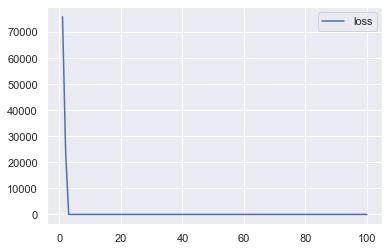

In [45]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

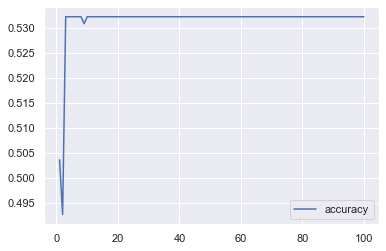

In [46]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.9055 - accuracy: 0.4840 - 733ms/epoch - 3ms/step
Loss: 0.9055219888687134, Accuracy: 0.4839650094509125


### Save the Model in HDF5 Format

In [48]:
# Export our model to HDF5 file
nn.save("./Trained_models/AlphabetSoupCharity_D3_D3.h5")

In [49]:
history_df.to_csv("./Data/D3_D3_history_df.csv")

### Import Model (Check)

In [50]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('./Trained_Models/AlphabetSoupCharity_D3_D3.h5')

### Evaluate the model (again as a check) using test data

In [51]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.9055 - accuracy: 0.4840 - 708ms/epoch - 3ms/step
Loss: 0.9055219888687134, Accuracy: 0.4839650094509125


### Predict the classification of "new / unseen" data

#### Examine Random Forest Classifier for comparison

In [52]:
# import dependencies
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [53]:
# Create a random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.776


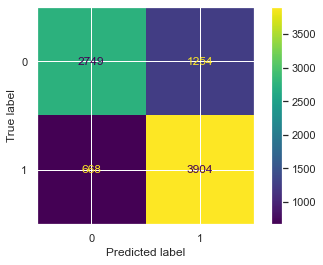

In [54]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= rf_model.classes_)
disp.plot()
plt.savefig("./Pictures/RandomForestClassifier_confusion_matrix.png")
plt.show()

In [55]:
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      4003
           1       0.76      0.85      0.80      4572

    accuracy                           0.78      8575
   macro avg       0.78      0.77      0.77      8575
weighted avg       0.78      0.78      0.77      8575

